<a href="https://colab.research.google.com/github/dbr-ufs/solar_fotovoltaica/blob/master/1_3_Espectro_Radia%C3%A7%C3%A3o_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Espectro da Radiação Solar

Todo corpo quente emite radiação ao seu redor. De acordo com a Lei de Planck de Radiação a temperatura da superfície determina o espectro da radiação. No caso
do Sol, a fusão do hidrogênio (principalmente) e dos demais elementos químicos geram a radiação solar. Observe no vídeo a seguir uma década de observação de como isso ocorre:

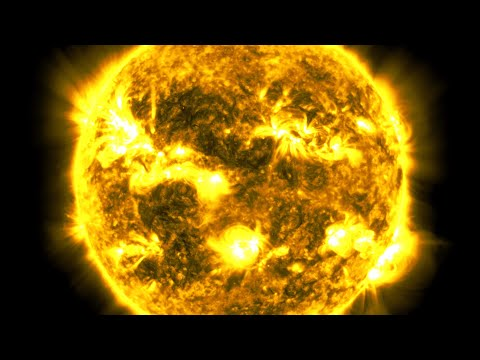

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("l3QQQu7QLoM")

O espectro real, medido fora da atmosfera da Terra (AM 0),  segue aproximadamente a emissão por radiação de um corpo negro a 5778 K. O termo AM 0 significa massa de ar 0 e significa que esta luz não passou pela atmosfera. Se integrar todas as frequências, encontra-se a já mensionada constante solar (1367 W / m2). No entanto, o espectro muda quando a luz do sol passa pela atmosfera. Tem-se várias razões para isso:

1. Reflexo de luz:
A luz solar é refletida na atmosfera e isso reduz a radiação que chega à Terra.

2. Absorção de luz:
As moléculas (O2, O3, H2O, CO2...) São excitadas em certos comprimentos de onda e absorvem uma parte da radiação causando "lacunas" no espectro, especialmente na região infravermelha (ver, por exemplo, $\lambda$ = 1400 nm).

3. Espalhamento de Rayleigh:
Se a luz incide sobre partículas menores do que o comprimento de onda, o espalhamento de Rayleigh ocorre. Isso é fortemente dependente do comprimento de onda (∼ 1/$\lambda^4$), então comprimentos de onda mais curtos são
espalhados com maior intensidade.

4. Espalhamento de aerossóis e partículas de poeira:
Isso diz respeito a partículas que são grandes em comparação com o comprimento de onda da luz. Neste caso se fala em dispersão de Mie. A força da dispersão de Mie depende muito da localização, sendo maior em áreas industriais e densamente povoadas.

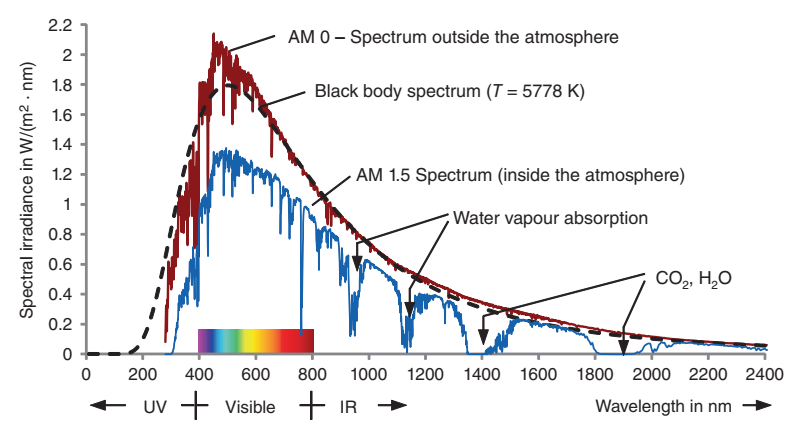

# Cálculos baseado na emissão de um corpo negro

## Material adaptado do tuturial: Radiation Part 1

<p>Created by: Nick Dawson aka AtmoGuy
<br>Revised 2019/07/24

Link: https://atmoguy.com/radiation-p1/


---

## Importando as bibliotecas de funções

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## $E_\lambda = \frac{2 \pi h c^2}{\lambda^5} \frac{1}{e^{\frac{h c}{k T \lambda}} -1}$

onde:

$\lambda$ é o comprimento de onda;

$h$ é a constante de Planck;

$c$ é a velocidade da luz;

$k$ é a constante de Boltzmann;

$T$ é a temperatura em Kelvin.


Criando as variáveis da Equação [Radiation Part 1](https://atmoguy.com/radiation-p1):

In [ ]:
pi = 3.14
c = 299792458   # m/s
h = 6.626e-34     # j s
k = 1.3806e-23    # j/K
T_sun = 5772          # K

print('Temperature of the sun is {} Kelvin'.format(T_sun))

Temperature of the sun is 5772 Kelvin


## Na sequência se cria um vetor com 100 comprimentos de onda entre $10^{-7}$ e $10^{-6}$.

In [ ]:
wavelengths = np.linspace(1e-7, 11e-6, 500) # meters
print(wavelengths[0:10])


[1.00000000e-07 1.21843687e-07 1.43687375e-07 1.65531062e-07
 1.87374749e-07 2.09218437e-07 2.31062124e-07 2.52905812e-07
 2.74749499e-07 2.96593186e-07]


## Assim se cria o vetor da primeira e segunda frações da equação que depois se multiplicam

In [ ]:
irradiance_left = (2*pi*h*c**2)*(wavelengths**-5)
irradiance_right = 1/(np.exp((h*c)/(k*T_sun*wavelengths))-1)
irradiance_sun = irradiance_left * irradiance_right
print(irradiance_sun[0:10])

[5.58465405e+08 1.81468280e+10 1.78421295e+11 8.67720262e+11
 2.70177027e+12 6.24350096e+12 1.17208696e+13 1.89449318e+13
 2.74128097e+13 3.64816749e+13]


## Plotando, ressaltando os comprimentos de luz visível

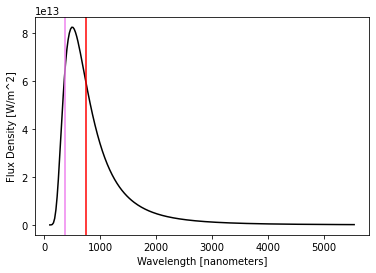

---
Max flux density is 82317697525992.36 W/m2
Max flux density occurs at 493.2 nm
violet line = low end of visible light wavelengths
red line = high end of visible light wavelengths


In [ ]:
plt.plot(wavelengths[0:250]*1e9, irradiance_sun[0:250], color = 'black') # multiply by 1e9 to convert from meters to nanometers
plt.xlabel('Wavelength [nanometers]')
plt.ylabel('Flux Density [W/m^2]')
plt.axvline(x=380, color = 'violet')
plt.axvline(x=740, color = 'red')
plt.show()
print('---')
print('Max flux density is {} W/m2'.format(np.max(irradiance_sun)))
index_of_max = np.argmax(irradiance_sun)
print('Max flux density occurs at {:.1f} nm'.format(wavelengths[index_of_max]*1e9))
print('violet line = low end of visible light wavelengths')
print('red line = high end of visible light wavelengths')

## Como se pode ver, o pico ocorre justamente perto dos 500 nm correspondente ao verde!

---

## Agora, veremos como seria a emissão da irradiação do corpo humano

In [ ]:
T_human = 310   # Roughly temperature of an average human [K]

irradiance_left = (2*pi*h*c**2)*(wavelengths**-5)
irradiance_right = 1/(np.exp((h*c)/(k*T_human*wavelengths))-1)
irradiance_human = irradiance_left * irradiance_right

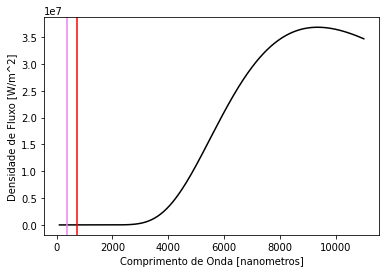

---
Max densidade de fluxo é 36813246.958005354 W/m2
A máx. densidade de fluxo ocorre em 9339.9 nm
linha rosa = limite inferior da luz visível
linha vermelha = limite superior da luz visível


In [ ]:
plt.plot(wavelengths*1e9, irradiance_human, color = 'black') # multiply by 1e9 to convert from meters to nanometers
plt.xlabel('Comprimento de Onda [nanometros]')
plt.ylabel('Densidade de Fluxo [W/m^2]')
plt.axvline(x=380, color = 'violet')
plt.axvline(x=740, color = 'red')
plt.show()
print('---')
print('Max densidade de fluxo é {} W/m2'.format(np.max(irradiance_human)))
index_of_max = np.argmax(irradiance_human)
print('A máx. densidade de fluxo ocorre em {:.1f} nm'.format(wavelengths[index_of_max]*1e9))
print('linha rosa = limite inferior da luz visível')
print('linha vermelha = limite superior da luz visível')

## Parece que o pico de emissão do corpo humano padrão é deslocado para o espectro infravermelho (~ 9 micrômetros). Agora, vamos plotar ambos no mesmo gráfico. A densidade do fluxo do Sol é muito maior do que a da Terra que precisamos normalizá-los por seus respectivos valores máximos.

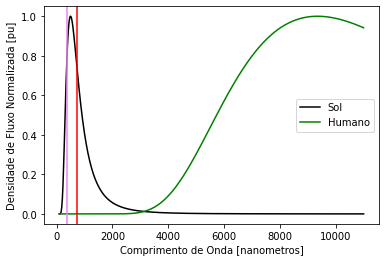

---
Rosa e vermelho mostra os limites da luz visível
Tudo a direita da linha vermelha compreende a faixa do infravermelho


In [ ]:
plt.plot(wavelengths*1e9, irradiance_sun/np.max(irradiance_sun), color = 'black') # multiplique por 1e9 para converter metros em nanometros
plt.plot(wavelengths*1e9, irradiance_human/np.max(irradiance_human), color = 'green')
plt.xlabel('Comprimento de Onda [nanometros]')
plt.ylabel('Densidade de Fluxo Normalizada [pu]')
plt.axvline(x=380, color = 'violet')
plt.axvline(x=740, color = 'red')
plt.legend(['Sol','Humano'])
plt.show()
print('---')
print('Rosa e vermelho mostra os limites da luz visível')
print('Tudo a direita da linha vermelha compreende a faixa do infravermelho')

Ver mais em: https://pt.wikipedia.org/wiki/Espectro_eletromagn%C3%A9tico

## Exemplo de simulação do coeficiente de absorção da água a 300 K 

É possível fazer a simulação dos demais elementos e assim verificar em que comprimentos de onda ocorre maior absorção.

Link: https://radis.readthedocs.io/en/latest/examples/examples.html

In [ ]:
%matplotlib inline
try:
  from radis import calc_spectrum
except ImportError:
  !pip install radis
  from radis import calc_spectrum

s = calc_spectrum(wavelength_min=1000,
                  wavelength_max=20000,
                  Tgas=300,
                  pressure=1,
                  molecule='H2O',
                  lineshape_optimization=None,
                  cutoff=1e-23,
                  isotope='1')
s.plot('abscoeff', wunit='nm', yscale='log')

# Tarefa

Estudar formas de simular a emissão do fóton no Sol, sua trajetória no espaço e a passagem do mesmo pela atmosfera. Escreva um documento de uma página informando as formas encontradas. Não se esqueça de referenciar corretamente seu trabalho. 

# Para saber mais

https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture06%20--%20Radiation.ipynb